# Personal Loan Acceptance Prediction 

## Objective:
The aim of this project is to predict which customers are likely to accept a personal loan offer based on various demographic and financial features. By understanding customer behavior, banks can better target their marketing campaigns and improve acceptance rates.

## Dataset Description:
This project uses the **Bank Marketing Dataset** from the UCI Machine Learning Repository. It contains data on marketing campaigns by a Portuguese banking institution, with the target variable indicating whether a customer accepted a term deposit offer.

### Key Features:
- `age`: Age of the customer
- `job`: Customer’s occupation
- `marital`: Marital status
- `education`: Education level
- `default`, `housing`, `loan`: Existing financial obligations
- `contact`, `month`, `day_of_week`: Campaign contact details
- `duration`, `campaign`, `pdays`, `previous`: Contact duration and frequency
- `poutcome`: Result of the previous campaign


### Target Variable:
- `deposit`: Indicates if the customer accepted the loan offer (`yes` or `no`)



In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# 2. Load the Dataset
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')  
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# 3. Basic exploration
print(df.head())
print(df.info())
print(df['deposit'].value_counts())  # target column assumed to be 'personal_loan'



   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


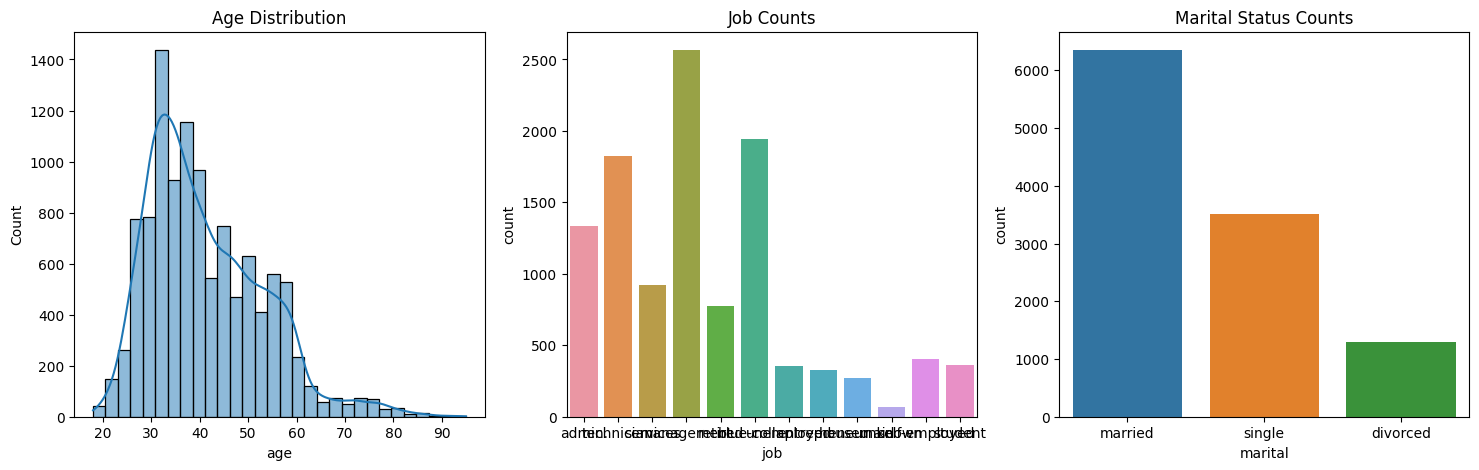

In [4]:
# 4. Check distribution of key features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Age Distribution')
sns.countplot(x='job', data=df, ax=axes[1])
axes[1].set_title('Job Counts')
sns.countplot(x='marital', data=df, ax=axes[2])
axes[2].set_title('Marital Status Counts')
plt.show()

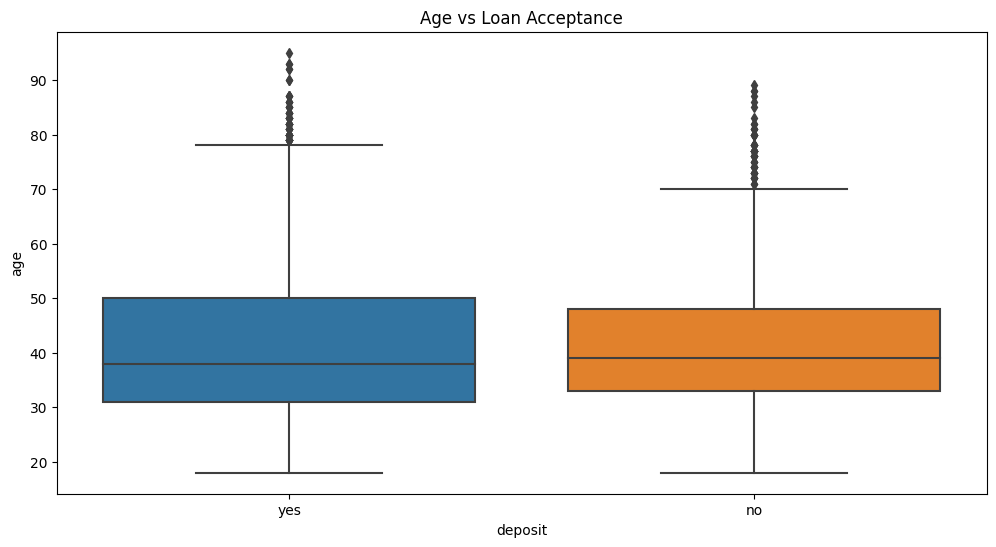

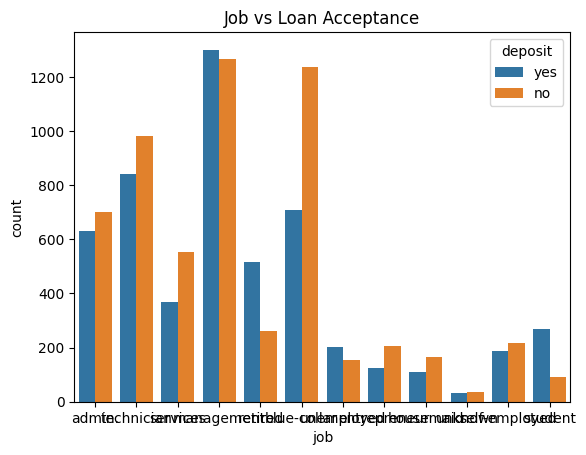

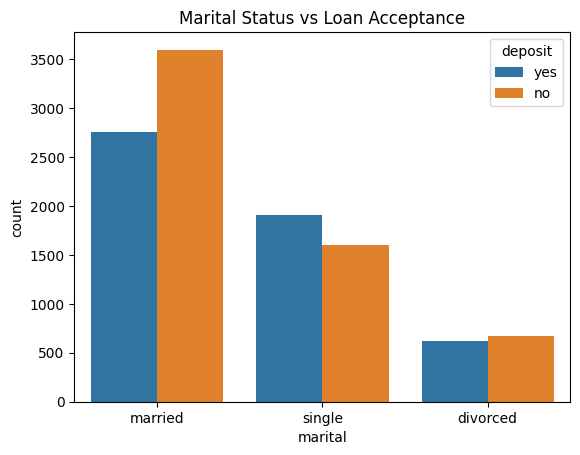

In [5]:
# 5. Explore relationship with target (loan acceptance)
plt.figure(figsize=(12,6))
sns.boxplot(x='deposit', y='age', data=df)
plt.title('Age vs Loan Acceptance')
plt.show()

sns.countplot(x='job', hue='deposit', data=df)
plt.title('Job vs Loan Acceptance')
plt.show()

sns.countplot(x='marital', hue='deposit', data=df)
plt.title('Marital Status vs Loan Acceptance')
plt.show()


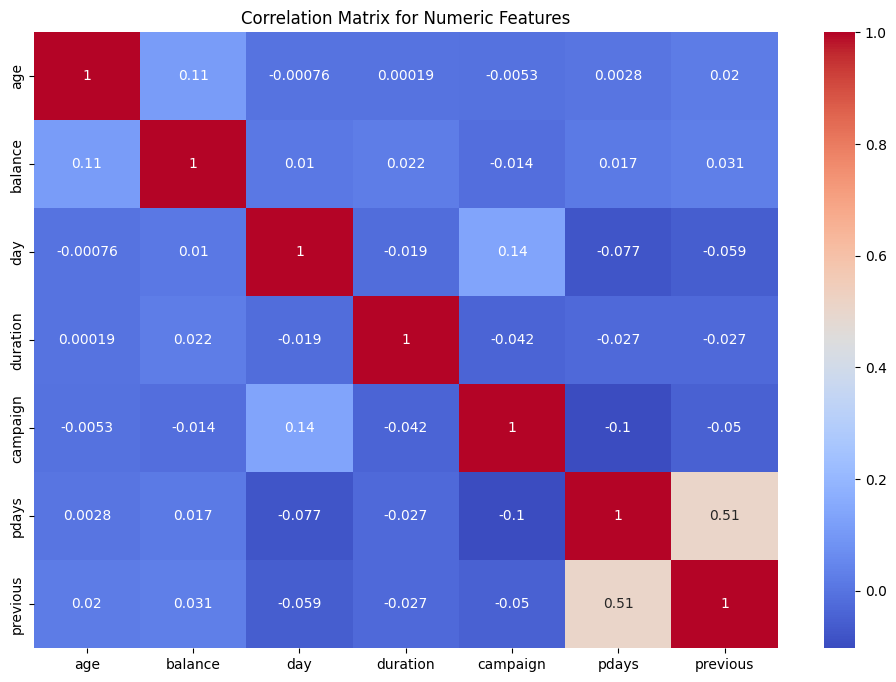

In [6]:
# Select numeric columns only for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix only on numeric columns
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()



In [7]:
# Drop Columns
irrelevant_cols = ['id', 'zip_code', 'some_other_irrelevant_col']  
for col in irrelevant_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [8]:
# 8. Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'deposit']  # exclude target if categorical

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
# 9. Define features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

In [10]:
# 10. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 11. Train model (try Logistic Regression first)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [12]:
# 12. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 77.88%
              precision    recall  f1-score   support

          no       0.78      0.80      0.79      1166
         yes       0.78      0.75      0.76      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233

[[938 228]
 [266 801]]
